<a id='Title-Fine-Tuning'></a>
<h1 style="color:SlateGray;">Fine Tuning</h1>

**Input dataset**

Kaggle Cats and Dogs: a set of evenly split cat and dog images.

**Output classification**

Predict whether an image contains a cat or a dog.

<h2 style="color:SlateGray;">Background</h2>

**Pre-trained models**

[*VGG16*](8_Feature_Extraction_Separated.ipynb#Pre-trained-models-VGG16)

**Layers**

[*Dense*](1_Image_Classification.ipynb#Layers-Dense)

[*Dropout*](5_Overfitting_And_Underfitting.ipynb#Layers-Dropout)

**Activations**

[*relu*](1_Image_Classification.ipynb#Activations-relu)

[*sigmoid*](2_Binary_Classification.ipynb#Activations-sigmoid)
		
**Optimizers**

[*rmsprop*](1_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

[*binary_crossentropy*](2_Binary_Classification.ipynb#Loss-functions-binary_crossentropy)

<h2 style="color:SlateGray;">Overview</h2>


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
import os

base_dir = r'./cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from keras.applications import VGG16
from keras import models
from keras import layers

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 21s 210ms/step - loss: 0.5541 - acc: 0.7155 - val_loss: 0.3507 - val_acc: 0.8520
Epoch 2/100
100/100 [==============================] - 17s 172ms/step - loss: 0.3857 - acc: 0.8275 - val_loss: 0.2412 - val_acc: 0.8980
Epoch 3/100
100/100 [==============================] - 17s 172ms/step - loss: 0.3205 - acc: 0.8570 - val_loss: 0.2171 - val_acc: 0.9020
Epoch 4/100
100/100 [==============================] - 18s 181ms/step - loss: 0.2779 - acc: 0.8755 - val_loss: 0.2030 - val_acc: 0.9120
Epoch 5/100
100/100 [==============================] - 18s 184ms/step - loss: 0.2681 - acc: 0.8805 - val_loss: 0.2269 - val_acc: 0.9060
Epoch 6/100
100/100 [==============================] - 18s 185ms/step - loss: 0.2509 - acc: 0.8970 - val_loss: 0.1898 - val_acc: 0.9140
Epoch 7/100
100/100 [==============================] - 18s 183ms/step - loss: 0.2328 - acc: 0.9000 - val_loss: 0.1850 - val_acc: 0.9150
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 19s 187ms/step - loss: 0.0408 - acc: 0.9835 - val_loss: 0.2004 - val_acc: 0.9360
Epoch 62/100
100/100 [==============================] - 19s 186ms/step - loss: 0.0364 - acc: 0.9880 - val_loss: 0.2247 - val_acc: 0.9280
Epoch 63/100
100/100 [==============================] - 18s 183ms/step - loss: 0.0403 - acc: 0.9845 - val_loss: 0.1989 - val_acc: 0.9430
Epoch 64/100
100/100 [==============================] - 19s 187ms/step - loss: 0.0417 - acc: 0.9845 - val_loss: 0.2055 - val_acc: 0.9350
Epoch 65/100
100/100 [==============================] - 18s 184ms/step - loss: 0.0399 - acc: 0.9860 - val_loss: 0.2273 - val_acc: 0.9290
Epoch 66/100
100/100 [==============================] - 18s 184ms/step - loss: 0.0354 - acc: 0.9855 - val_loss: 0.2083 - val_acc: 0.9390
Epoch 67/100
100/100 [==============================] - 18s 185ms/step - loss: 0.0362 - acc: 0.9875 - val_loss: 0.1977 - val_acc: 0.9390
Epoch 68/100
100/100 [===================

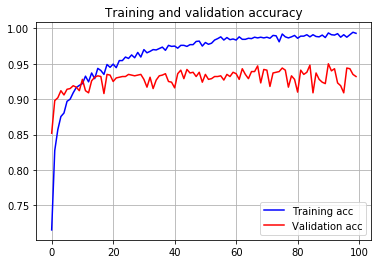

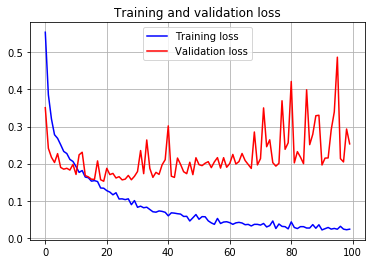

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

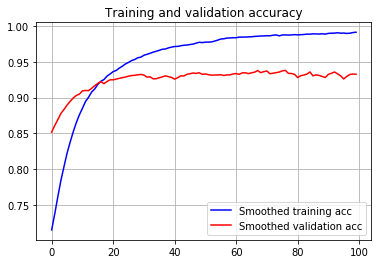

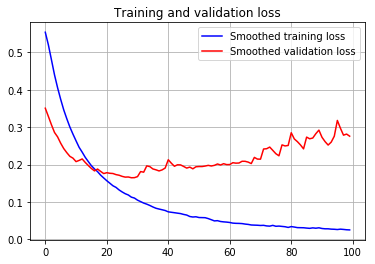

In [10]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'b', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'r', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'b', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'r', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9339999914169311
